In [10]:
import pandas as pd
pd.options.display.float_format = '{:.5f}'.format

In [3]:
tkffuwnj = pd.read_csv('./csv/data/dataset/12345.csv')

In [5]:
tkffuwnj.columns

Index(['종목명', 'years', 'month', '상장주식수대비월거래량합계_x', '거래대금_x', '상장시가총액',
       '벤치마크지수', '소외주', 'EPS', 'PER', 'BPS', 'PBR', '업종명', '업종월평균PBR',
       'LOW P/B', '거래소코드', '회계년도', '총자본증가율(IFRS)', '자기자본증가율(IFRS)',
       '매출액증가율(IFRS)', '순이익증가율(IFRS)', '매출액순이익률(IFRS)', '총자본순이익률(IFRS)',
       '자기자본순이익률(IFRS)', '자본금순이익률(IFRS)', '유보율(IFRS)', '사내유보율(IFRS)',
       '자기자본배당률(IFRS)', '배당성향(IFRS)', '자기자본구성비율(IFRS)', '타인자본구성비율(IFRS)',
       '부채비율(IFRS)', '총자본회전률(IFRS)', '자기자본회전률(IFRS)', '자본금회전률(IFRS)',
       '타인자본회전률(IFRS)', 'PER(최저)(IFRS)', 'PBR(최저)(IFRS)', 'PCR(최저)(IFRS)',
       'PSR(최저)(IFRS)', '종가', '대비', '등락률', '거래량', '거래대금_y', '시가총액',
       '상장주식수대비거래량', '표준편차', '거래량_합계', '거래량_일평균', '거래대금_합계', '거래대금_일평균',
       '상장주식수대비월거래량합계_y', 'label'],
      dtype='object')

In [74]:
tkffuwnj1 = tkffuwnj.drop(['종목명', 'years', 'month','상장주식수대비월거래량합계_x', '거래대금_x','벤치마크지수','업종명', '업종월평균PBR','소외주','LOW P/B','거래소코드', '회계년도','EPS', 'PER', '총자본증가율(IFRS)', '자기자본증가율(IFRS)',
       '매출액증가율(IFRS)', '순이익증가율(IFRS)', '매출액순이익률(IFRS)', '총자본순이익률(IFRS)',
       '자기자본순이익률(IFRS)', '자본금순이익률(IFRS)', '유보율(IFRS)', '사내유보율(IFRS)',
       '자기자본배당률(IFRS)', '배당성향(IFRS)', '자기자본구성비율(IFRS)', '타인자본구성비율(IFRS)',
       '부채비율(IFRS)', '총자본회전률(IFRS)', '자기자본회전률(IFRS)', '자본금회전률(IFRS)',
       '타인자본회전률(IFRS)','PER(최저)(IFRS)', 'PBR(최저)(IFRS)',
       'PCR(최저)(IFRS)', 'PSR(최저)(IFRS)','상장시가총액', '거래량_합계','거래대금_합계','거래대금_y','시가총액'],axis=1)

In [48]:
tkffuwnj1.columns

Index(['상장시가총액', 'BPS', 'PBR', 'PER(최저)(IFRS)', 'PBR(최저)(IFRS)',
       'PCR(최저)(IFRS)', 'PSR(최저)(IFRS)', '종가', '대비', '등락률', '거래량', '거래대금_y',
       '시가총액', '상장주식수대비거래량', '표준편차', '거래량_합계', '거래량_일평균', '거래대금_합계',
       '거래대금_일평균', '상장주식수대비월거래량합계_y', 'label'],
      dtype='object')

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rc('font', family='Malgun Gothic')

c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:>

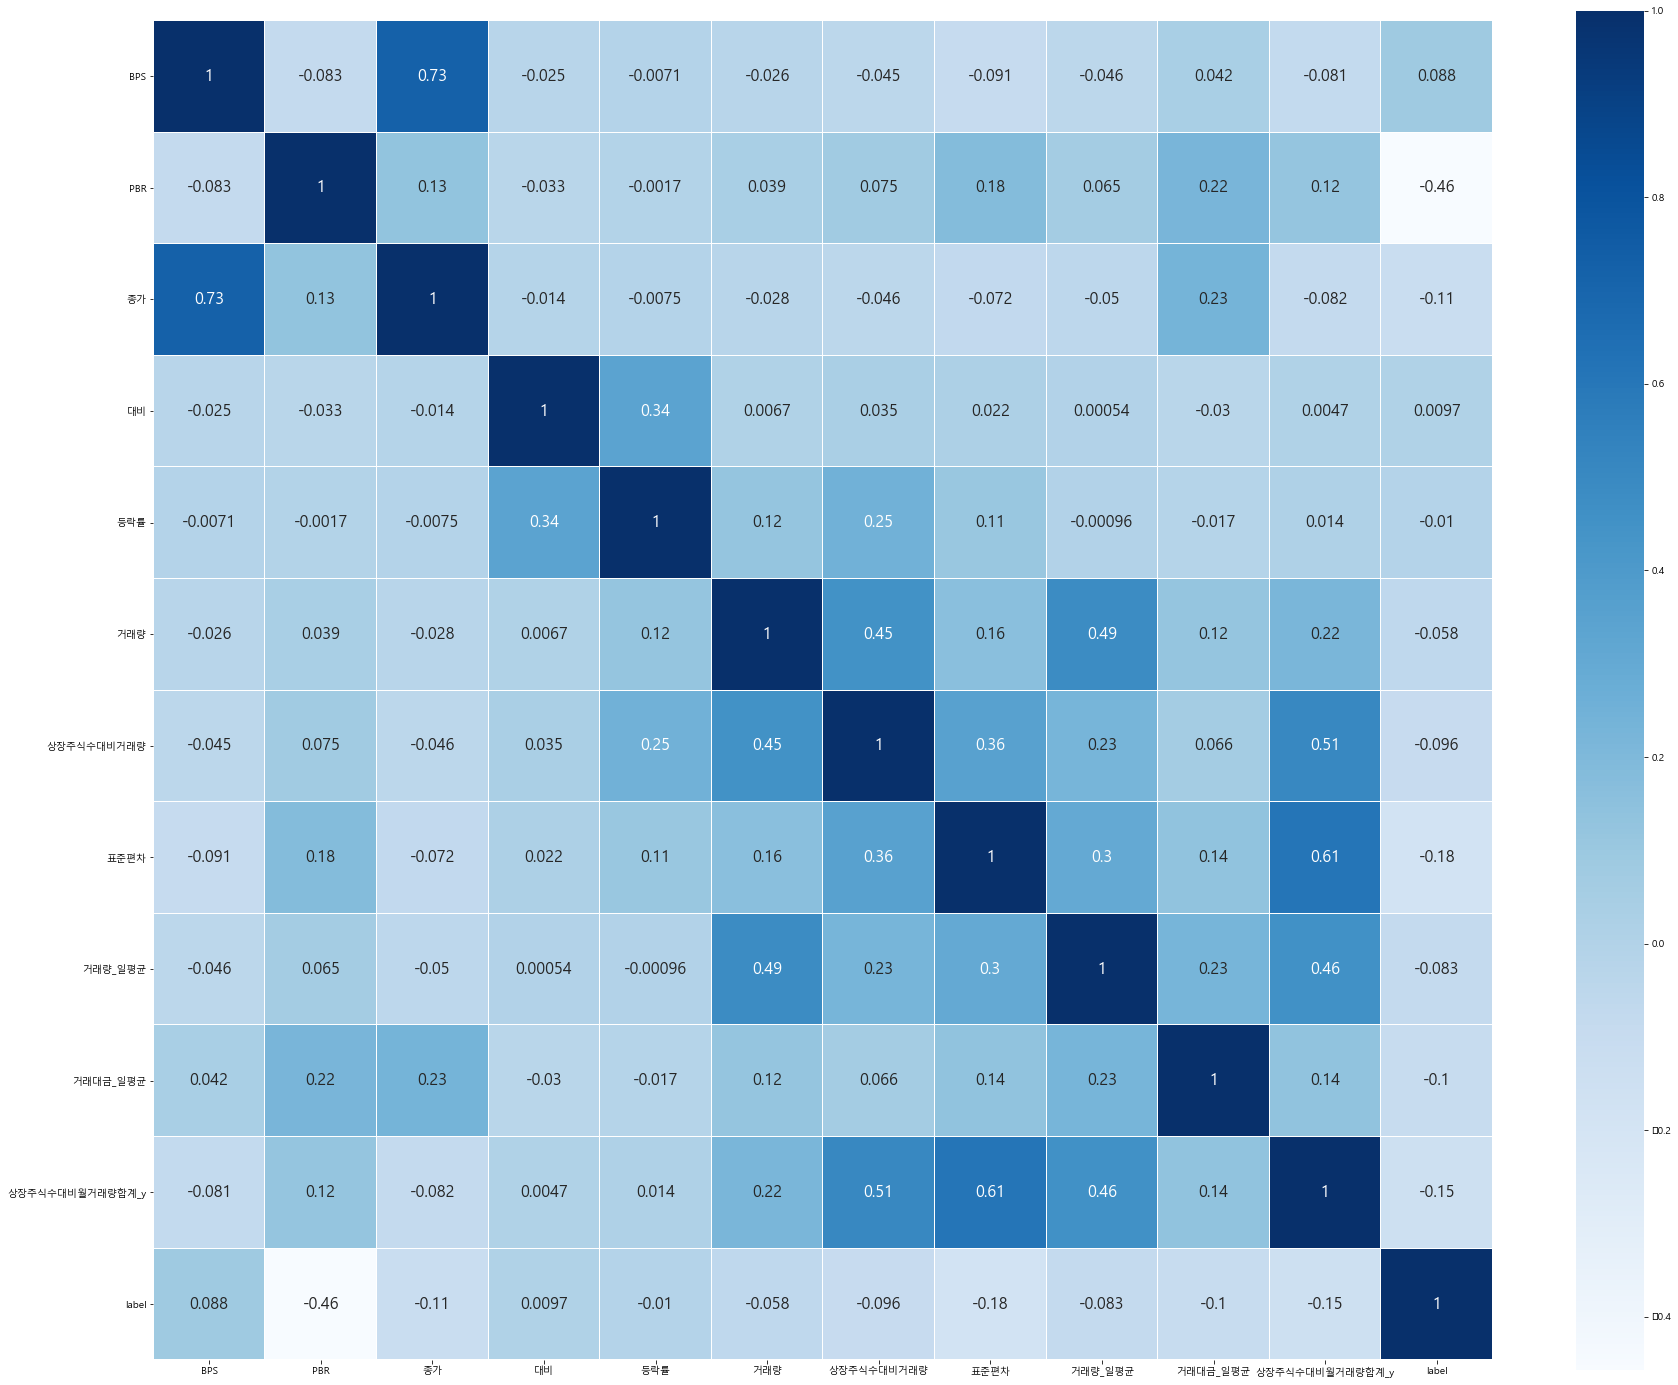

In [81]:
tkffuwnj1.corr()
plt.figure(figsize=(30,25))
sns.heatmap(tkffuwnj1.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = 'Blues', linecolor = "white", annot = True, annot_kws = {"size" :16})

In [79]:
tkffuwnj1 = tkffuwnj1.dropna(subset=['표준편차'])

In [77]:
tkffuwnj1.isna().sum()

BPS                212
PBR                212
종가                   0
대비                   0
등락률                  0
거래량                  0
상장주식수대비거래량           0
표준편차                 1
거래량_일평균              0
거래대금_일평균             0
상장주식수대비월거래량합계_y      0
label                0
dtype: int64

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [80]:
X_train = tkffuwnj1[['BPS', 'PBR', '종가', '대비', '등락률', '거래량', '상장주식수대비거래량',
       '표준편차',  '거래량_일평균', '거래대금_일평균', '상장주식수대비월거래량합계_y',
       'label']]
def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif['VIF_Factor'] = [variance_inflation_factor(X_train.values, i)
                         for i in range(X_train.shape[1])]
    vif['Feature'] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor          Feature
0      2.37260              BPS
1      1.13397              PBR
2      2.47641               종가
3      1.14036               대비
4      1.24741              등락률
5      1.65175              거래량
6      1.81494       상장주식수대비거래량
7      1.15242             표준편차
8      1.70988          거래량_일평균
9      1.24296         거래대금_일평균
10     2.22984  상장주식수대비월거래량합계_y
11     1.97395            label


In [83]:
from scipy import stats
from scipy.stats import shapiro

In [84]:
tkffuwnj1.columns

Index(['BPS', 'PBR', '종가', '대비', '등락률', '거래량', '상장주식수대비거래량', '표준편차', '거래량_일평균',
       '거래대금_일평균', '상장주식수대비월거래량합계_y', 'label'],
      dtype='object')

c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


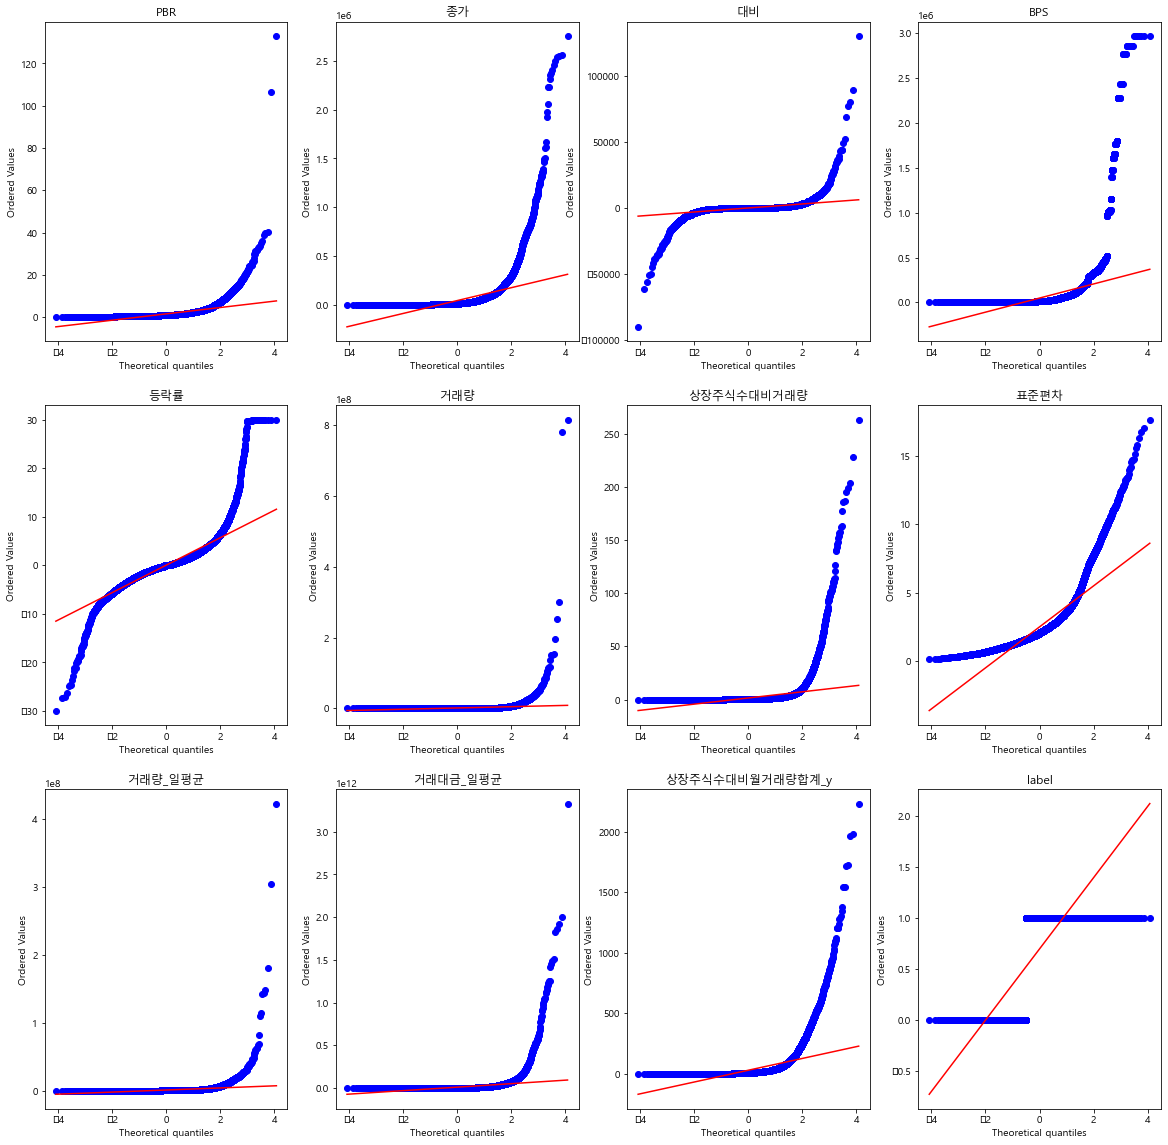

In [86]:
from matplotlib.pyplot import imread
fig, axes = plt.subplots(3, 4)
fig.set_size_inches((20,20))

stats.probplot(tkffuwnj1["PBR"], dist=stats.norm, plot=axes[0,0])
axes[0,0].title.set_text("PBR")
stats.probplot(tkffuwnj1["종가"], dist=stats.norm, plot=axes[0,1])
axes[0,1].title.set_text("종가")
stats.probplot(tkffuwnj1["대비"], dist=stats.norm, plot=axes[0,2])
axes[0,2].title.set_text("대비")
stats.probplot(tkffuwnj1["BPS"], dist=stats.norm, plot=axes[0,3])
axes[0,3].title.set_text("BPS")
stats.probplot(tkffuwnj1["등락률"], dist=stats.norm, plot=axes[1,0])
axes[1,0].title.set_text("등락률")
stats.probplot(tkffuwnj1["거래량"], dist=stats.norm, plot=axes[1,1])
axes[1,1].title.set_text("거래량")
stats.probplot(tkffuwnj1["상장주식수대비거래량"], dist=stats.norm, plot=axes[1,2])
axes[1,2].title.set_text("상장주식수대비거래량")
stats.probplot(tkffuwnj1["표준편차"], dist=stats.norm, plot=axes[1,3])
axes[1,3].title.set_text("표준편차")
stats.probplot(tkffuwnj1["거래량_일평균"], dist=stats.norm, plot=axes[2,0])
axes[2,0].title.set_text("거래량_일평균")
stats.probplot(tkffuwnj1["거래대금_일평균"], dist=stats.norm, plot=axes[2,1])
axes[2,1].title.set_text("거래대금_일평균")
stats.probplot(tkffuwnj1["상장주식수대비월거래량합계_y"], dist=stats.norm, plot=axes[2,2])
axes[2,2].title.set_text("상장주식수대비월거래량합계_y")
stats.probplot(tkffuwnj1["label"], dist=stats.norm, plot=axes[2,3])
axes[2,3].title.set_text("label")


In [88]:
df_data = tkffuwnj1.drop(['label'],axis=1)
target = tkffuwnj1['label']

In [91]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
standardScaler.fit(df_data)
train_data_standardScaled = standardScaler.transform(df_data)

In [93]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
standardScaler = StandardScaler()
standard_scaled = standardScaler.fit_transform(df_data)
standard_fit = pd.DataFrame(standard_scaled, columns=['BPS', 'PBR', '종가', '대비', '등락률', '거래량', '상장주식수대비거래량', '표준편차', '거래량_일평균','거래대금_일평균', '상장주식수대비월거래량합계_y'])
standard_fit

,BPS,PBR,종가,대비,등락률,거래량,상장주식수대비거래량,표준편차,거래량_일평균,거래대금_일평균,상장주식수대비월거래량합계_y
0,-0.21932,-0.26929,-0.28009,0.01395,-0.01267,-0.10436,-0.21739,-1.12373,-0.18202,-0.19211,-0.37904
1,-0.21932,-0.28677,-0.28505,0.01395,-0.01267,-0.10373,-0.21145,-0.88206,-0.18110,-0.19123,-0.36920
2,-0.21932,-0.28240,-0.28459,0.01395,-0.01267,-0.10434,-0.21721,-0.69822,-0.18111,-0.19126,-0.37030
3,-0.21932,-0.26056,-0.27874,-0.00457,-0.14094,-0.10443,-0.21810,-0.83322,-0.18078,-0.19088,-0.36838
4,-0.22019,-0.30862,-0.29225,-0.00457,-0.16018,-0.10198,-0.19488,-1.14367,-0.18063,-0.19090,-0.36850
...,...,...,...,...,...,...,...,...,...,...,...
30822,-0.27674,1.84097,-0.16928,-0.18985,-0.71815,-0.08546,-0.17458,0.30754,0.14017,0.42979,0.08615
30823,-0.27674,2.59245,-0.10306,-0.22690,-0.65402,0.04782,0.13338,3.16467,0.09822,0.57290,0.30654
30824,-0.29877,0.76617,-0.36685,0.02692,0.42987,0.23675,0.20407,2.35583,0.36431,-0.08859,0.33717
30825,-0.29877,0.80550,-0.36622,-0.06942,-2.52998,0.25004,0.22053,2.11954,1.08029,0.05707,1.27766


c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


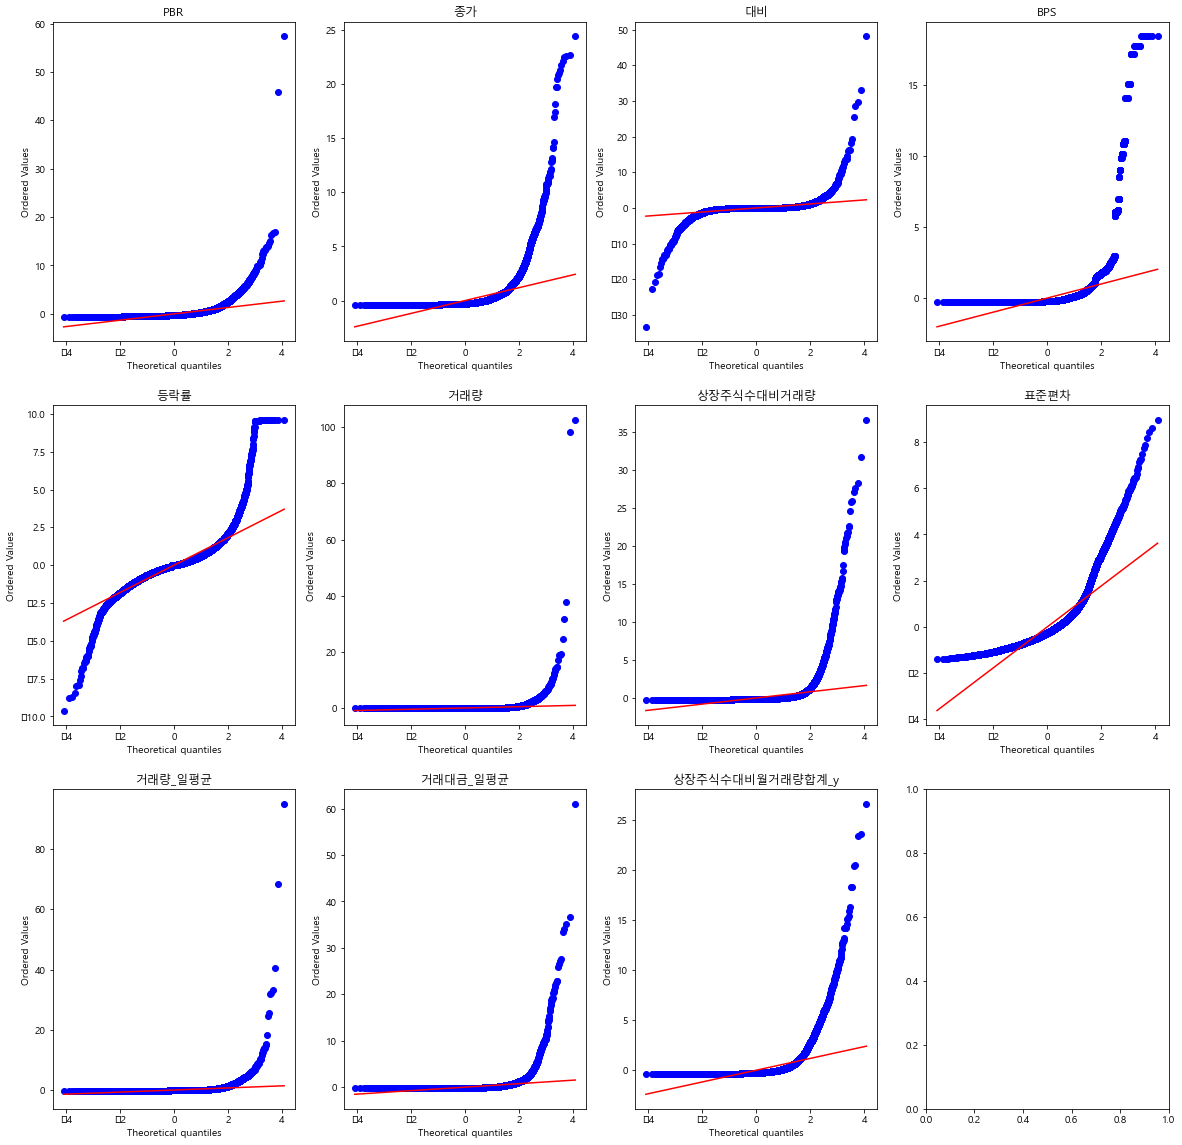

In [94]:
from matplotlib.pyplot import imread
fig, axes = plt.subplots(3, 4)
fig.set_size_inches((20,20))

stats.probplot(standard_fit["PBR"], dist=stats.norm, plot=axes[0,0])
axes[0,0].title.set_text("PBR")
stats.probplot(standard_fit["종가"], dist=stats.norm, plot=axes[0,1])
axes[0,1].title.set_text("종가")
stats.probplot(standard_fit["대비"], dist=stats.norm, plot=axes[0,2])
axes[0,2].title.set_text("대비")
stats.probplot(standard_fit["BPS"], dist=stats.norm, plot=axes[0,3])
axes[0,3].title.set_text("BPS")
stats.probplot(standard_fit["등락률"], dist=stats.norm, plot=axes[1,0])
axes[1,0].title.set_text("등락률")
stats.probplot(standard_fit["거래량"], dist=stats.norm, plot=axes[1,1])
axes[1,1].title.set_text("거래량")
stats.probplot(standard_fit["상장주식수대비거래량"], dist=stats.norm, plot=axes[1,2])
axes[1,2].title.set_text("상장주식수대비거래량")
stats.probplot(standard_fit["표준편차"], dist=stats.norm, plot=axes[1,3])
axes[1,3].title.set_text("표준편차")
stats.probplot(standard_fit["거래량_일평균"], dist=stats.norm, plot=axes[2,0])
axes[2,0].title.set_text("거래량_일평균")
stats.probplot(standard_fit["거래대금_일평균"], dist=stats.norm, plot=axes[2,1])
axes[2,1].title.set_text("거래대금_일평균")
stats.probplot(standard_fit["상장주식수대비월거래량합계_y"], dist=stats.norm, plot=axes[2,2])
axes[2,2].title.set_text("상장주식수대비월거래량합계_y")



In [92]:
train_data_standardScaled

array([[-0.21931553, -0.26929488, -0.28009037, ..., -0.18202024,
        -0.19211487, -0.37903815],
       [-0.21931553, -0.28677116, -0.28504539, ..., -0.18110048,
        -0.19123264, -0.36919554],
       [-0.21931553, -0.28240209, -0.28459493, ..., -0.18111087,
        -0.19126397, -0.37029623],
       ...,
       [-0.29877309,  0.76617487, -0.36684823, ...,  0.36431404,
        -0.08858926,  0.33717307],
       [-0.29877309,  0.80549651, -0.36621759, ...,  1.08029469,
         0.05706669,  1.2776587 ],
       [-0.27169075,  0.24625546, -0.29450497, ..., -0.04333887,
        -0.02228867,  0.89672118]])